# Spaceship Titanic

## 全体像をつかむ

宇宙船タイタニック号は, 1カ月前に就航した恒星間旅客船である．約13,000人の乗客を乗せたこの船は，太陽系からの移住者を，近くの星の周りを回る3つの新しく居住可能な太陽系外惑星に運ぶ処女航海に出発した．

宇宙船タイタニックは，ケンタウルス座アルファ星を周回し，最初の目的地であるカンクリ星55番地へ向かう途中，砂煙の中に隠れていた時空の異変に遭遇した．残念なことに，この船は1000年前のタイタニック号と同じ運命をたどった．船は無事だったものの，乗客の半数近くが異次元に飛ばされてしまったのだ！

救助隊を助け，失われた乗客を取り戻すために，宇宙船の破損したコンピューターシステムから回収された記録をもとに，どの乗客が異常によって運ばれたかを予測することに挑戦してください．

彼らを救い，歴史を変えることに貢献しましょう！

## データを入手する

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pathlib

# 訓練セットのデータを読み込む
train_data_path = pathlib.Path('../input/spaceship-titanic/train.csv')
train_data = pd.read_csv(train_data_path)

c:\Users\11325\kaggle\spaceship-titanic\src


### データの構造をざっと見る

In [7]:
# 最初の５行を見る
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### データの各列についての説明

* `PassengerId` - 各旅客のユニークなID. 各IDは `ggggg_pp` の形式をとり，`ggggg` は乗客が一緒に旅行しているグループ，`pp` はそのグループ内の番号です. グループ内の人は家族であることが多いが，常に家族とは限らない
* `HomePlanet` - 旅客が出発した惑星で，通常は定住している惑星です. 
* `CryoSleep` - 航海中，お客様が仮死状態になることを選択されたかどうかを示しています. 冷凍睡眠中のお客様は，キャビンに閉じ込められます. 
* `Cabin` - 乗客が滞在するキャビン番号です. `deck/num/side` の形式で，side には P (Port)，S (Starboard) のいずれかが入ります. 
* `Destination` - 乗客が降り立つ惑星です. 
* `Age` - 搭乗者の年齢. 
* `VIP` - 航海中に特別なVIPサービスを支払ったかどうか. 
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - 宇宙船タイタニック号の数々の豪華な設備で，お客様がそれぞれのサービスを利用した金額です. 
* `Name` - 搭乗者の姓と名. 
* `Transported` - 乗客が別の次元に転送されたかどうか. これがターゲットであり，予測しようとしている列です. 

In [12]:
# 欠損値があるかどうかなどを調べる
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
# すべての数値属性について，統計情報を出す
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### ヒストグラムを出力してみる

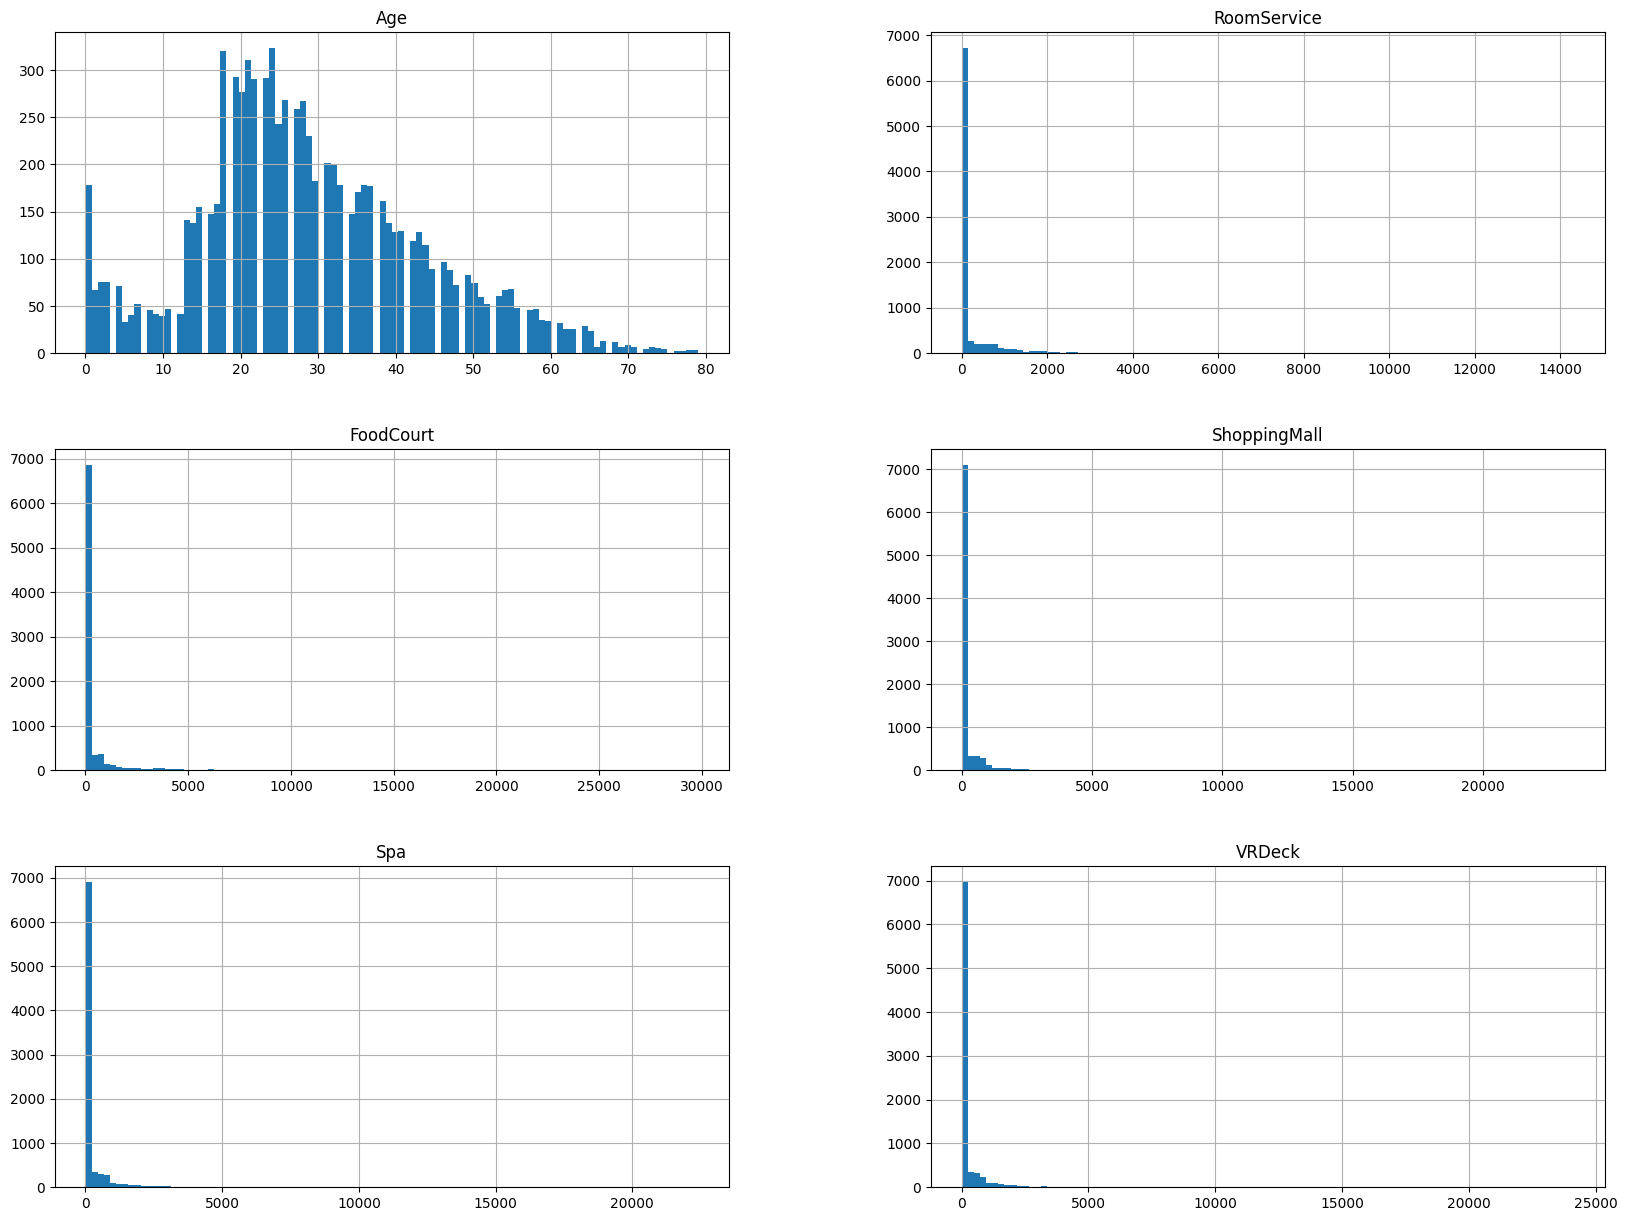

In [15]:
# ヒストグラムをプロットする
%matplotlib inline
import matplotlib.pyplot as plt

train_data.hist(bins=100, figsize=(20, 15))
plt.show()


ヒストグラムからわかること

* Age にはなぜか特定の年齢のひとがいないようだ. 一定の間隔で，該当者がゼロの年齢が現れる．
* Age 以外の５つの数値属性は，どれも０付近に値が偏っている

In [19]:
train_data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [20]:
train_data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [18]:
train_data["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [21]:
train_data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [23]:
train_data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [25]:
train_data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64